<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch05_07_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.07. 기초모델 구현 - Logistic Regression
---
* 날짜:
* 이름:

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
PATH = '/content/drive/MyDrive/[ Work ] NCS/[훈련과정] 딥러닝 프레임워크 실무/과정02.데이터분석/05.머신러닝기반데이터분석'
sys.path.append(PATH)
from data_loader import *

## 클래스 작성
---

In [ ]:
class LogisticRegressionGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    self.w = self.seed.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
  
  def model(self, X):
    z = np.dot(X, self.w[:-1])+self.w[-1] # linear
    y = 1. / (1. +np.exp(-z) ) # activation
    return y

  def predict(self, X):
    return np.where( self.model(X) >= 0.5, 1, 0) 
    
  def loss(self, y, y_hat):
    return -y.dot(np.log(y_hat)) -(1-y).dot(np.log(1-y_hat))
  
  def accuracy(self, y, y_logit):
    return np.count_nonzero(y==y_logit)/len(y)
  
  def evaluate(self, X, y):
    y_hat = self.model(X) 
    loss = ( self.loss(y,y_hat).sum() ) / len(y) # 손실 평균
  
    y_logit = self.predict(X)
    acc = self.accuracy(y, y_logit)
    return loss, acc

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):    

      # 최적화   
      y_hat = self.model(X)
      self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
      self.w[-1] += self.lr * np.sum(y-y_hat)
    
      
      # 평가
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w)



  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    y_logit = self.predict(X)

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_logit, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')    
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## iris 데이터로 분류 진행
---

### **데이터 로드**

In [ ]:
X_train, X_test, y_train, y_test = iris_loader(2)

(150, 4) (150,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

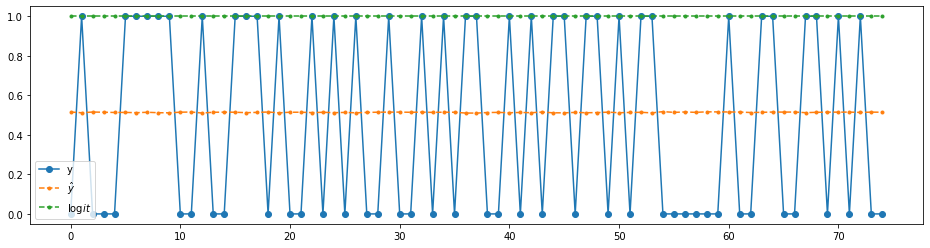

성능:  (0.6971611251403644, 0.4666666666666667)


In [ ]:
model = LogisticRegressionGD()

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
model.fit(X_train, y_train, epochs=20)

[Epoch 0] loss: 0.66  acc: 0.47
[Epoch 1] loss: 0.63  acc: 0.96
[Epoch 2] loss: 0.6  acc: 1.0
[Epoch 3] loss: 0.58  acc: 1.0
[Epoch 4] loss: 0.55  acc: 1.0
[Epoch 5] loss: 0.53  acc: 1.0
[Epoch 6] loss: 0.5  acc: 1.0
[Epoch 7] loss: 0.48  acc: 1.0
[Epoch 8] loss: 0.46  acc: 1.0
[Epoch 9] loss: 0.45  acc: 1.0
[Epoch 10] loss: 0.43  acc: 1.0
[Epoch 11] loss: 0.41  acc: 1.0
[Epoch 12] loss: 0.4  acc: 1.0
[Epoch 13] loss: 0.38  acc: 1.0
[Epoch 14] loss: 0.37  acc: 1.0
[Epoch 15] loss: 0.36  acc: 1.0
[Epoch 16] loss: 0.35  acc: 1.0
[Epoch 17] loss: 0.34  acc: 1.0
[Epoch 18] loss: 0.33  acc: 1.0
[Epoch 19] loss: 0.32  acc: 1.0


### **학습 후 성능평가**

성능:  (0.3166610417175666, 1.0)


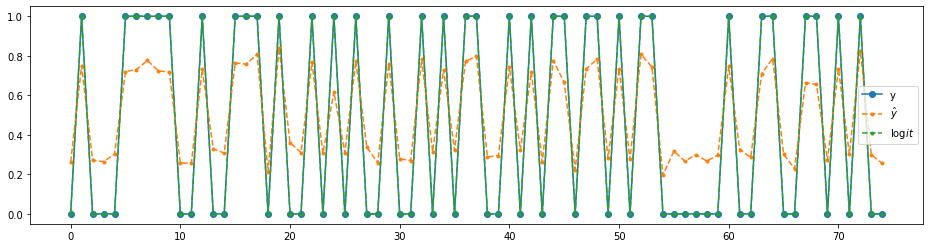

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.3051389174842882, 1.0)


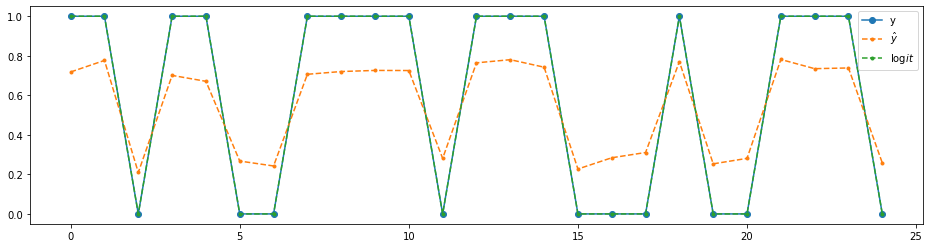

In [ ]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

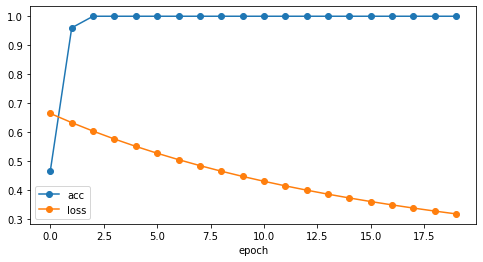

In [ ]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [ ]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = LogisticRegressionGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.7  acc: 0.47
[Epoch 1] loss: 0.7  acc: 0.47
[Epoch 2] loss: 0.7  acc: 0.47
[Epoch 3] loss: 0.7  acc: 0.47
[Epoch 4] loss: 0.7  acc: 0.47
[Epoch 5] loss: 0.7  acc: 0.47
[Epoch 6] loss: 0.69  acc: 0.47
[Epoch 7] loss: 0.69  acc: 0.47
[Epoch 8] loss: 0.69  acc: 0.47
[Epoch 9] loss: 0.69  acc: 0.47
===== lr 1e-05 ==== (0.6855795338743449, 0.6)
[Epoch 0] loss: 0.69  acc: 0.47
[Epoch 1] loss: 0.69  acc: 0.47
[Epoch 2] loss: 0.69  acc: 0.47
[Epoch 3] loss: 0.68  acc: 0.47
[Epoch 4] loss: 0.68  acc: 0.47
[Epoch 5] loss: 0.68  acc: 0.47
[Epoch 6] loss: 0.67  acc: 0.47
[Epoch 7] loss: 0.67  acc: 0.47
[Epoch 8] loss: 0.67  acc: 0.47
[Epoch 9] loss: 0.66  acc: 0.48
===== lr 0.0001 ==== (0.6509355976380847, 0.6)
[Epoch 0] loss: 0.66  acc: 0.47
[Epoch 1] loss: 0.63  acc: 0.93
[Epoch 2] loss: 0.6  acc: 1.0
[Epoch 3] loss: 0.57  acc: 1.0
[Epoch 4] loss: 0.55  acc: 1.0
[Epoch 5] loss: 0.53  acc: 1.0
[Epoch 6] loss: 0.5  acc: 1.0
[Epoch 7] loss: 0.48  acc: 1.0
[Epoch 8] loss: 0.46  acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
